<a href="https://colab.research.google.com/github/nicolassalomon96/aprendizaje_maquina_UNS/blob/master/TP6/Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP6 - Regresión: Boston Housing Prices

Presentado: Nicolás Salomón - email: nicolassalomon96@gmail.com

El dataset de viviendas de Boston contiene 506 observaciones y 14 variables. El objetivo de este proyecto es comprender cuál de las variables en estudio impulsan el precio de las viviendas en Boston y poder predecir los precios a partir de los atributos.

## 1. Librerias necesarias

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report, r2_score


## 2. Exploración del dataset

In [2]:
true_news = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBHP/data/housing_data.csv")
true_news.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


**Atributos:**

CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town.

CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to five Boston employment centres

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10000

PTRATIO: pupil-teacher ratio by town

B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT: % lower status of the population

MEDV: Median value of owner-occupied homes in $1000's

In [3]:
true_news.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Se observa que existen valores no definidos (null) que deben ser completados. Para resolver este inconveniente se aplicará la técnica de reemplazar dichos campos con el valor medio correspondiente. 

In [5]:
df1 = true_news.copy()
df1.isnull().sum()
for column in df1:
    if(df1[column].isnull().sum()!=0):
        df1[column]=df1[column].fillna(df1[column].dropna().mean())

#Comprobación si exisen valores "null"
print(np.any(np.isnan(df1)))

False


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


**Histograma de cada atributo**

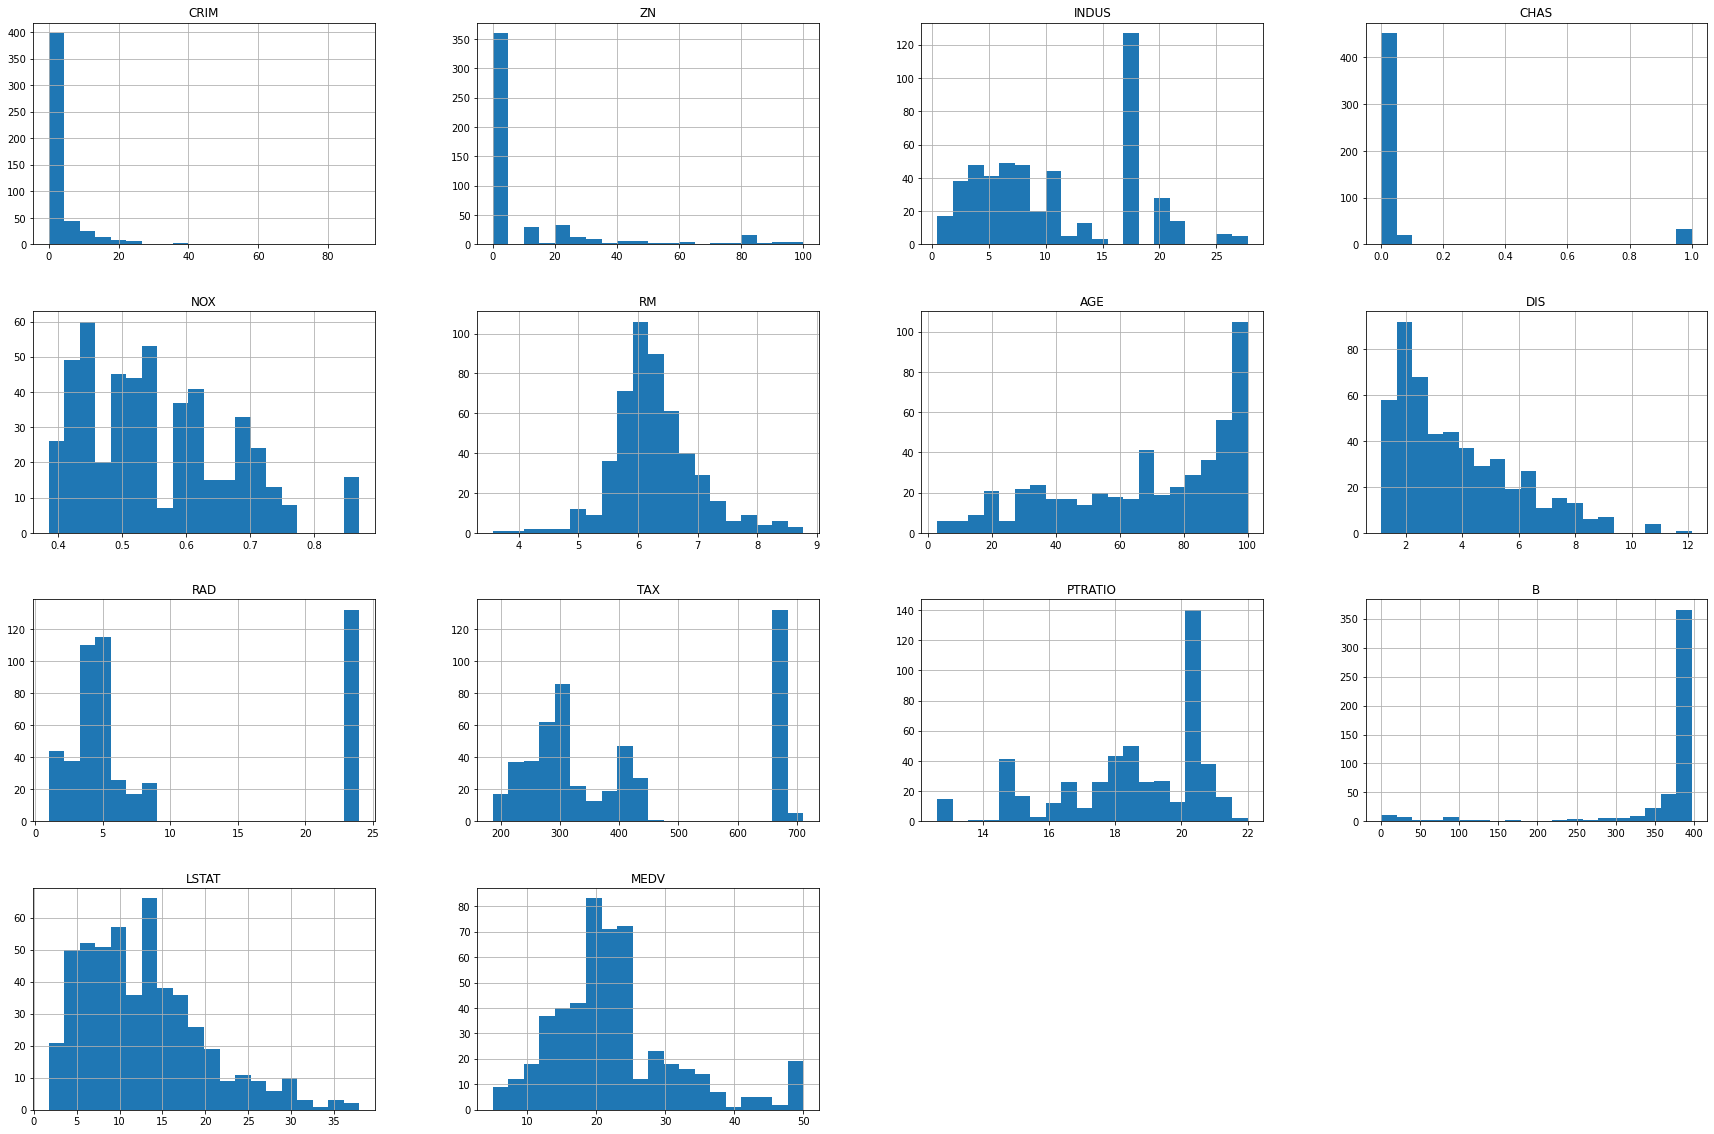

In [6]:
df1.hist(bins=20,figsize=(30,20))
plt.show()

**Atributos en función del precio**

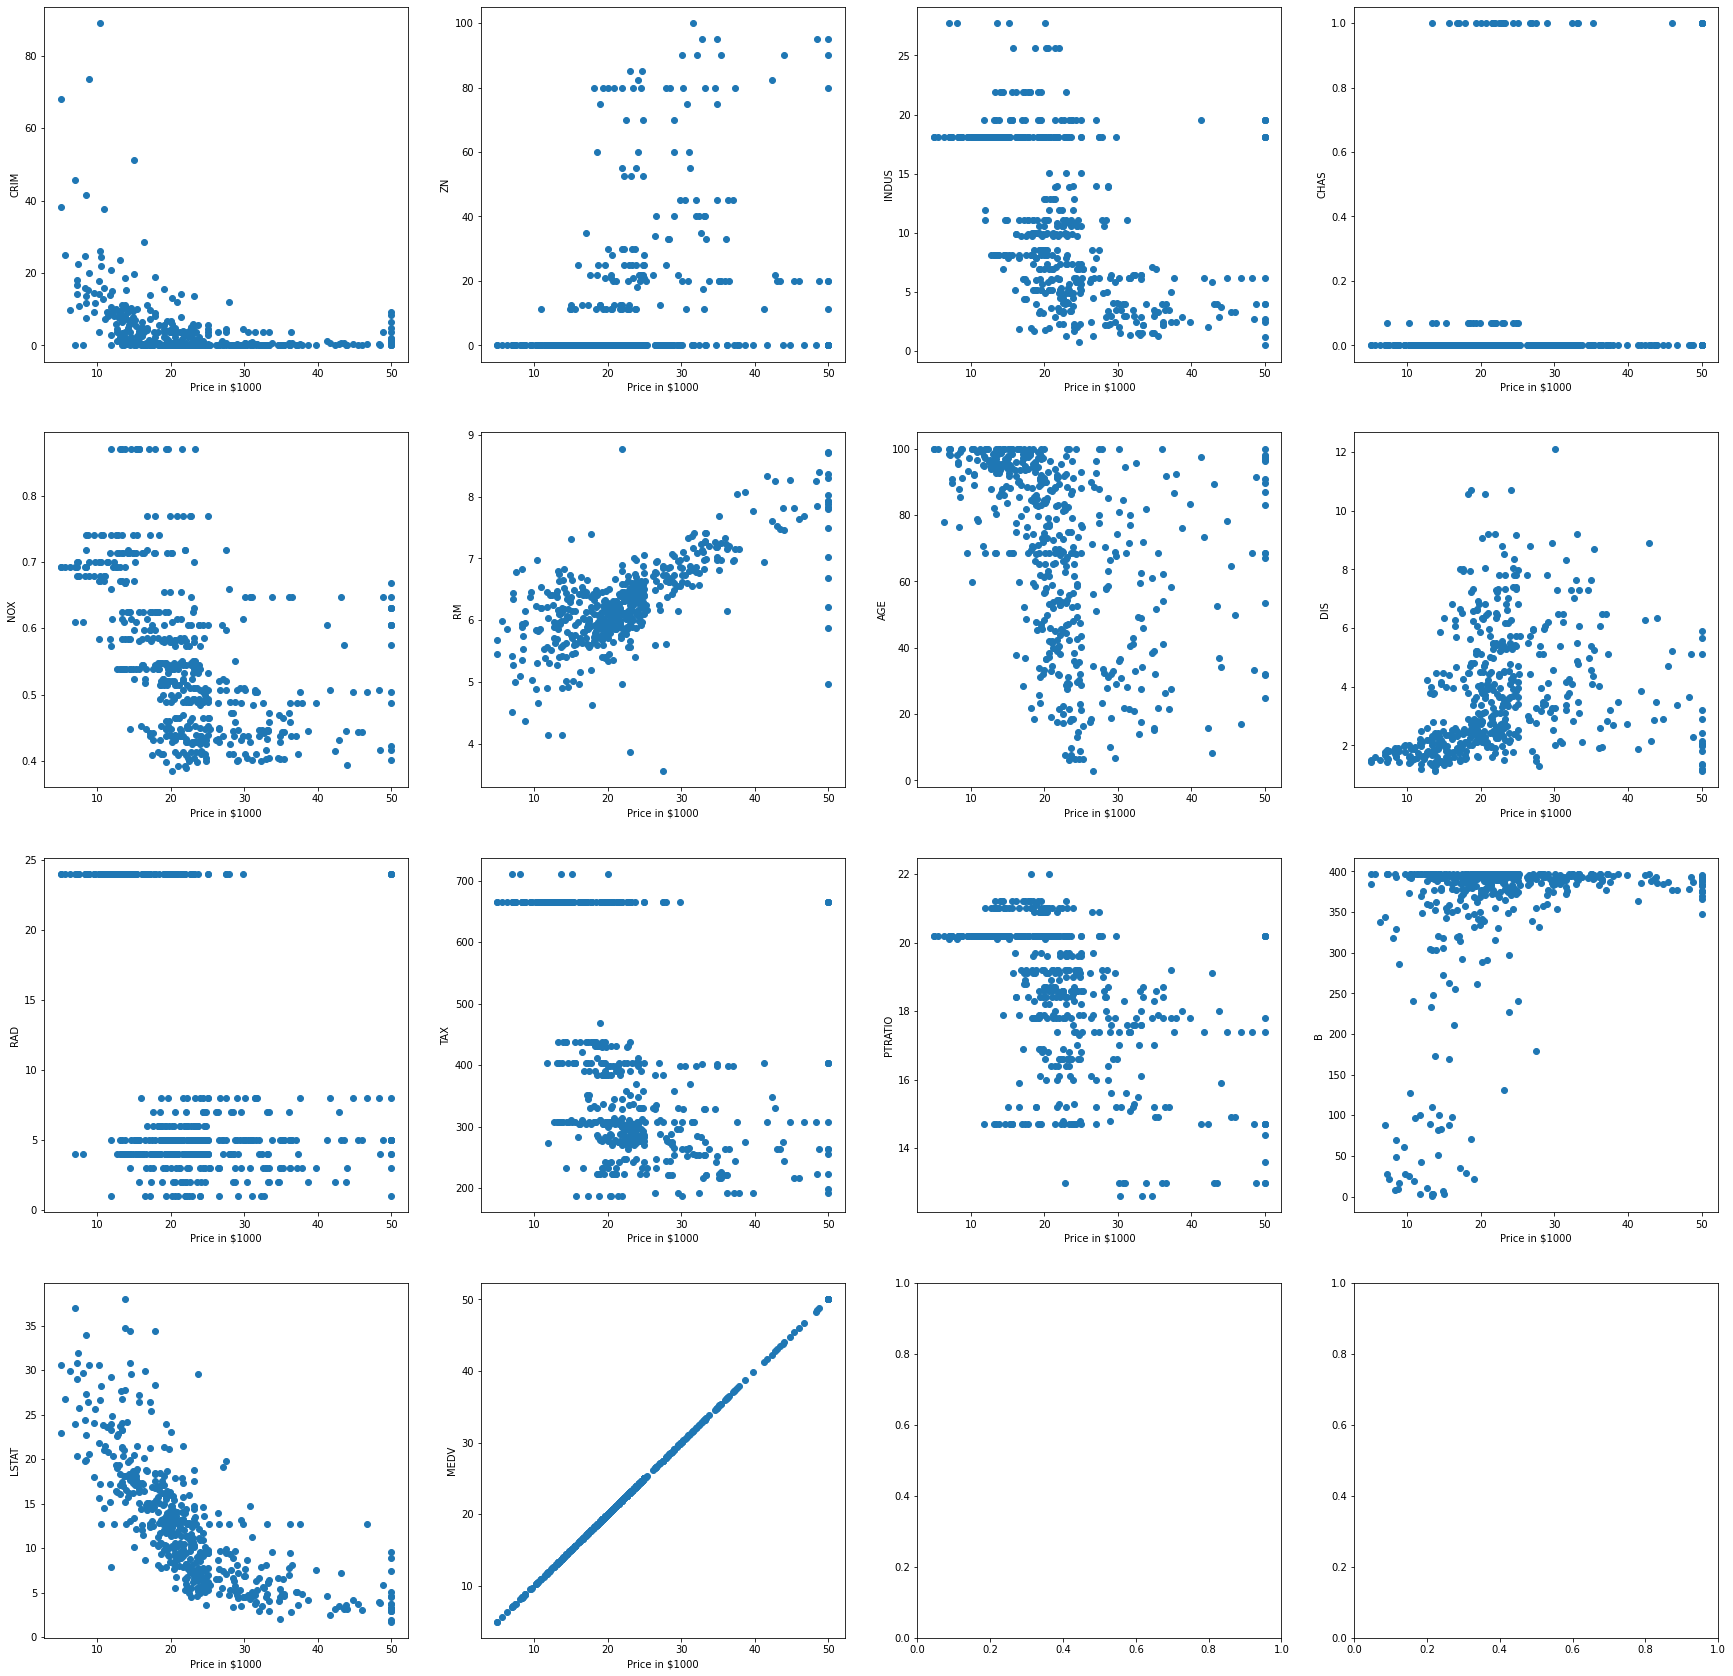

In [10]:
rows, columns = 4,4
fig, axs = plt.subplots(rows,columns,figsize=(30,30))
k = 0
for i in range(rows):
  for j in range(columns):
    if k <= 13:
      axs[i,j].scatter(y=df1[df1.columns.values[k]], x=df1['MEDV'])
      axs[i,j].set_ylabel(df1.columns.values[k])
      axs[i,j].set_xlabel('Price in $1000')
      k += 1

plt.show()

### Conclusiones del análisis gráfico de datos:

* Se puede observar una cierta correlación lineal positiva entre el precio de las casas y el número de habitaciones de la misma.

* Por otro lado, también se observa una correlación inversa entre el precio de las casas y el menor estatus de la población. A menor precio, mayor es el porcentaje de población con menor estatus.

* Se observa que en aquellas zonas donde hay mayor tasa de crímenes, el precio de la vivienda es menor.

* Se observa que, cuando el índice de accesibilidad a carreteras radiales (RAD) es elevado, el precio de las casas no llega a valores muy elevados, esto podría indicar que las personas prefieren lugares más tranquilos y no tan cerca de dichas carreteras.

* Algo similar se observa en la tasa de impuestos a la propiedad, cuando estos son elevados, el precio no llega a valores muy altos.

* Por último, se observa una cierta correlación entre la distancia ponderada a 5 centros de empleos en Boston y los precios. Cuando las distancias son mas pequeñas se puede apreciar una mayor proporción de casas con precios bajos.

**Correlación entre datos**


In [11]:
corr=df1.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


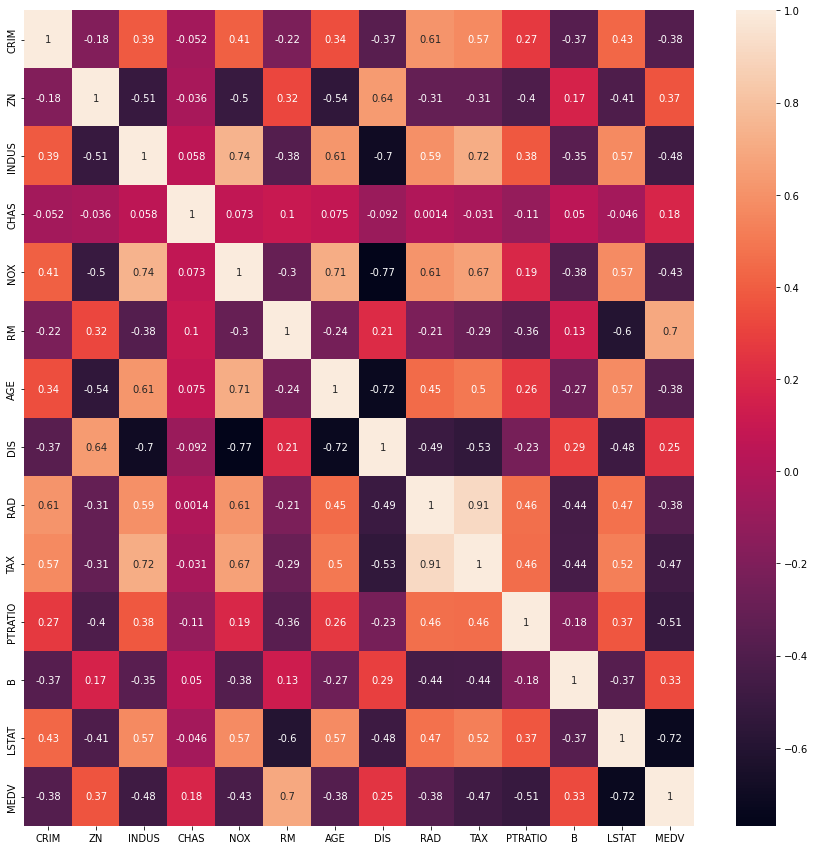

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)
plt.show()

## 3. Modelos de regresión

### 3.1. Eliminación recursiva de atributos

Observamos algunas correlaciones entre variables. Por ello aplicaremos el algoritmo de eliminación recursiva de atributos para seleccionar una determinada cantidad de atributos más representativos. Para obtener el número de atributos correcto, evaluaremos la precisión de cada regresor.

In [20]:
#Función para separar el dataset en entrenamiento, validación y prueba
def train_validate_test_split(df, train_percent=.6, validate_percent=.2):
    np.random.seed(1)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

#Función para iterar y encontrar el mejor valor de n para la eliminación recursiva de atributos
def loop_best_n(df1, regressor):
  #Separamos la columna objetivo
  target = df1['MEDV']
  #Para aplicar ExtraTreesClassifier() es necesario que los datos sean enteros,
  #una vez realizada la eliminación recursiva, los datos se vuelven a considerar flotantes.
  target = np.round(target).astype(int)

  #Eliminamos la columna objetivo del dataset
  df2 = df1.drop(['MEDV'], axis=1)
  columnas = list(df2.columns.values)

  accuracy = []

  for n in range(1,12):
    modelo = ExtraTreesClassifier()
    recursive_delete = RFE(estimator=modelo, n_features_to_select=n)
    recursive_delete = recursive_delete.fit(df2, target)

    atrib = recursive_delete.support_
    relevant_features = [columnas[i] for i in list(atrib.nonzero()[0])]
    relevant_features.append('MEDV') #Volvemos a incluir el atributo target junto con los atributos mas relevantes

    #Dataframe final con las características más importantes
    df3 = df1[relevant_features]

    train, validate, test = train_validate_test_split(df3, 0.8, 0.15)

    X_train = train.iloc[:,:-1]
    y_train = train.loc[:,['MEDV']] #Atributo objetivo: diagnosis

    X_validate = validate.iloc[:,:-1]
    y_validate = validate.loc[:,['MEDV']] #Atributo objetivo: diagnosis

    X_test = test.iloc[:,:-1]
    y_test = test.loc[:,['MEDV']] #Atributo objetivo: diagnosis

    regression = regressor
    regression.fit(X_train, np.ravel(y_train))

    y_pred = regression.predict(X_test)
    accuracy.append(r2_score(y_test, y_pred))

  accuracy = np.array(accuracy)
  x = np.array(range(1,12))
  print(f"Best accuracy: {round(np.max(accuracy)*100,2)}% with n = {np.argmax(accuracy)+1}")
  plt.figure(figsize=(15,10))
  plt.plot(x,accuracy)
  plt.xticks(x)
  plt.xlabel('N')
  plt.ylabel('Accuracy')
  plt.title('Accuracy vs N')
  plt.show()


### 3.2. Regresión Lineal


Best accuracy: 82.84% with n = 8


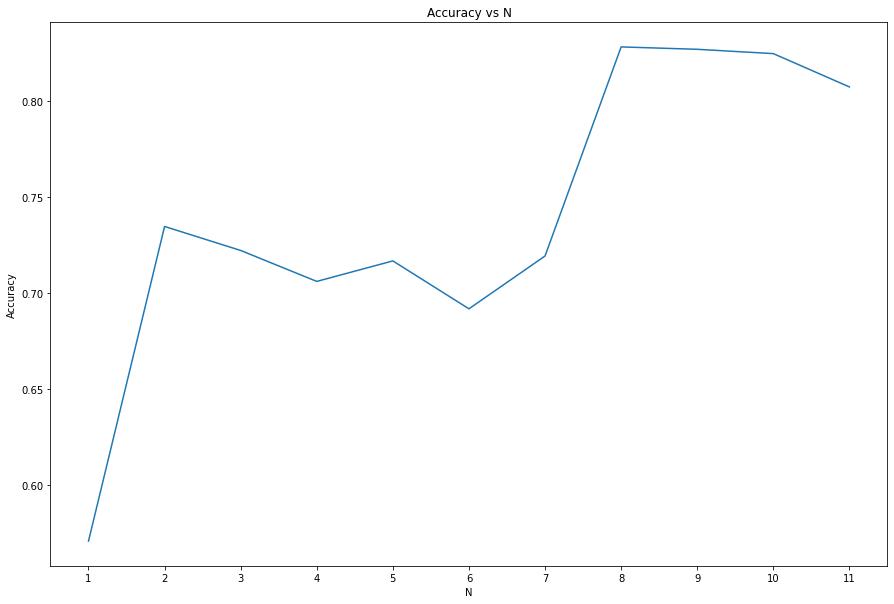

In [21]:
loop_best_n(df1, LinearRegression())

In [ ]:
#DE ACUERDO AL ANALISIS ANTERIOR, LA MEJOR PRESICIÓN SE OBTUVO CON N=8

#Separamos la columna objetivo
target = df1['MEDV']
#Para aplicar ExtraTreesClassifier() es necesario que los datos sean enteros,
#una vez realizada la eliminación recursiva, los datos se vuelven a considerar flotantes.
target = np.round(target).astype(int)

#Eliminamos la columna objetivo del dataset
df2 = df1.drop(['MEDV'], axis=1)
columnas = list(df2.columns.values)

n = 8 #Número de atributos a seleccionar
modelo = ExtraTreesClassifier()
recursive_delete = RFE(estimator=modelo, n_features_to_select=n)
recursive_delete = recursive_delete.fit(df2, target)

atrib = recursive_delete.support_
relevant_features = [columnas[i] for i in list(atrib.nonzero()[0])]
relevant_features.append('MEDV') #Volvemos a incluir el atributo target junto con los atributos mas relevantes

#Dataframe final con las características más importantes
df3 = df1[relevant_features]
df3

,CRIM,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,MEDV
0,0.00632,0.538,6.575,65.200000,4.0900,15.3,396.90,4.980000,24.0
1,0.02731,0.469,6.421,78.900000,4.9671,17.8,396.90,9.140000,21.6
2,0.02729,0.469,7.185,61.100000,4.9671,17.8,392.83,4.030000,34.7
3,0.03237,0.458,6.998,45.800000,6.0622,18.7,394.63,2.940000,33.4
4,0.06905,0.458,7.147,54.200000,6.0622,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...
501,0.06263,0.573,6.593,69.100000,2.4786,21.0,391.99,12.715432,22.4
502,0.04527,0.573,6.120,76.700000,2.2875,21.0,396.90,9.080000,20.6
503,0.06076,0.573,6.976,91.000000,2.1675,21.0,396.90,5.640000,23.9
504,0.10959,0.573,6.794,89.300000,2.3889,21.0,393.45,6.480000,22.0


In [ ]:
train, validate, test = train_validate_test_split(df3, 0.8, 0.15)
print(f"Datos de entrenamiento: {train.shape}")
print(f"Datos de validacion: {validate.shape}")
print(f"Datos de prueba: {test.shape}")

X_train = train.iloc[:,:-1]
y_train = train.loc[:,['MEDV']] #Atributo objetivo: diagnosis

X_validate = validate.iloc[:,:-1]
y_validate = validate.loc[:,['MEDV']] #Atributo objetivo: diagnosis

X_test = test.iloc[:,:-1]
y_test = test.loc[:,['MEDV']] #Atributo objetivo: diagnosis

regression = LinearRegression()
regression.fit(X_train, y_train)

y_pred = regression.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("Accuracy:",accuracy*100,"%\n")

#Resultados para 10 datos de prueba
for count, price in enumerate(y_test['MEDV'].iloc[0:10]):
  print(f"{count+1}. Predicted price(x1000): {round(y_pred[count][0],3)} - Real price(x1000): {price}")

Datos de entrenamiento: (404, 9)
Datos de validacion: (75, 9)
Datos de prueba: (27, 9)
Accuracy: 82.83726508510776 %

1. Predicted price(x1000): 10.355 - Real price(x1000): 16.3
2. Predicted price(x1000): 14.237 - Real price(x1000): 13.1
3. Predicted price(x1000): 26.737 - Real price(x1000): 29.6
4. Predicted price(x1000): 19.611 - Real price(x1000): 13.1
5. Predicted price(x1000): 16.708 - Real price(x1000): 19.1
6. Predicted price(x1000): 17.709 - Real price(x1000): 12.1
7. Predicted price(x1000): 19.412 - Real price(x1000): 21.7
8. Predicted price(x1000): 23.338 - Real price(x1000): 21.9
9. Predicted price(x1000): 32.332 - Real price(x1000): 33.2
10. Predicted price(x1000): 31.701 - Real price(x1000): 29.9


### 3.3. Regresión basada en Árboles de Decisión

Best accuracy: 93.0% with n = 10


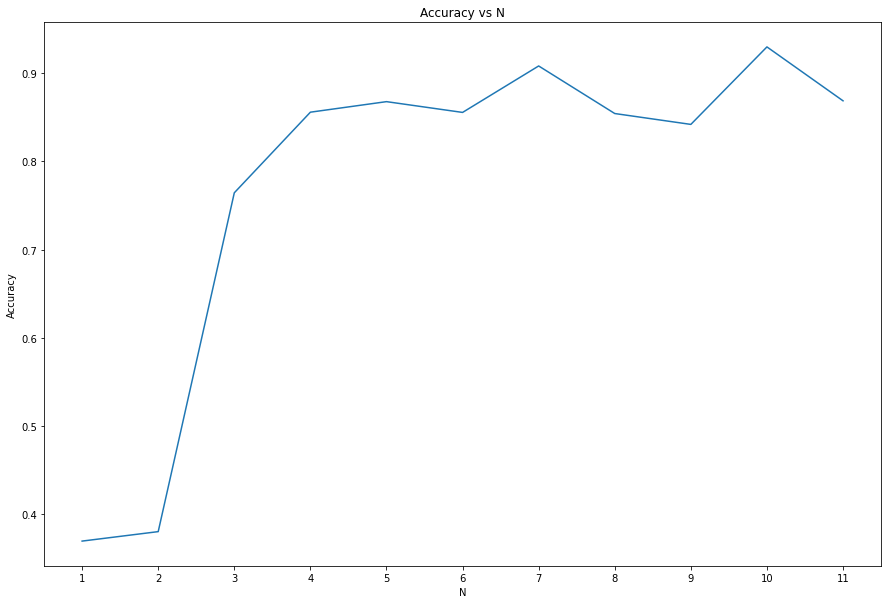

In [22]:
loop_best_n(df1, DecisionTreeRegressor())

In [ ]:
#DE ACUERDO AL ANALISIS ANTERIOR, LA MEJOR PRESICIÓN SE OBTUVO CON N=10

#Separamos la columna objetivo
target = df1['MEDV']
#Para aplicar ExtraTreesClassifier() es necesario que los datos sean enteros,
#una vez realizada la eliminación recursiva, los datos se vuelven a considerar flotantes.
target = np.round(target).astype(int)

#Eliminamos la columna objetivo del dataset
df2 = df1.drop(['MEDV'], axis=1)
columnas = list(df2.columns.values)

n = 10 #Número de atributos a seleccionar
modelo = ExtraTreesClassifier()
recursive_delete = RFE(estimator=modelo, n_features_to_select=n)
recursive_delete = recursive_delete.fit(df2, target)

atrib = recursive_delete.support_
relevant_features = [columnas[i] for i in list(atrib.nonzero()[0])]
relevant_features.append('MEDV') #Volvemos a incluir el atributo target junto con los atributos mas relevantes

#Dataframe final con las características más importantes
df3 = df1[relevant_features]
df3

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.200000,4.0900,296,15.3,396.90,4.980000,24.0
1,0.02731,7.07,0.469,6.421,78.900000,4.9671,242,17.8,396.90,9.140000,21.6
2,0.02729,7.07,0.469,7.185,61.100000,4.9671,242,17.8,392.83,4.030000,34.7
3,0.03237,2.18,0.458,6.998,45.800000,6.0622,222,18.7,394.63,2.940000,33.4
4,0.06905,2.18,0.458,7.147,54.200000,6.0622,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.100000,2.4786,273,21.0,391.99,12.715432,22.4
502,0.04527,11.93,0.573,6.120,76.700000,2.2875,273,21.0,396.90,9.080000,20.6
503,0.06076,11.93,0.573,6.976,91.000000,2.1675,273,21.0,396.90,5.640000,23.9
504,0.10959,11.93,0.573,6.794,89.300000,2.3889,273,21.0,393.45,6.480000,22.0


In [ ]:
train, validate, test = train_validate_test_split(df3, 0.8, 0.15)
print(f"Datos de entrenamiento: {train.shape}")
print(f"Datos de validacion: {validate.shape}")
print(f"Datos de prueba: {test.shape}")

X_train = train.iloc[:,:-1]
y_train = train.loc[:,['MEDV']] #Atributo objetivo: diagnosis

X_validate = validate.iloc[:,:-1]
y_validate = validate.loc[:,['MEDV']] #Atributo objetivo: diagnosis

X_test = test.iloc[:,:-1]
y_test = test.loc[:,['MEDV']] #Atributo objetivo: diagnosis

regression = DecisionTreeRegressor()
regression.fit(X_train, y_train)

y_pred = regression.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("Accuracy:",accuracy*100,"%\n")

#Resultados para 10 datos de prueba
for count, price in enumerate(y_test['MEDV'].iloc[0:10]):
  print(f"{count+1}. Predicted price(x1000): {y_pred[count]} - Real price(x1000): {price}")

Datos de entrenamiento: (404, 11)
Datos de validacion: (75, 11)
Datos de prueba: (27, 11)
Accuracy: 93.0004944151271 %

1. Predicted price(x1000): 11.9 - Real price(x1000): 16.3
2. Predicted price(x1000): 15.6 - Real price(x1000): 13.1
3. Predicted price(x1000): 28.5 - Real price(x1000): 29.6
4. Predicted price(x1000): 15.4 - Real price(x1000): 13.1
5. Predicted price(x1000): 20.1 - Real price(x1000): 19.1
6. Predicted price(x1000): 8.5 - Real price(x1000): 12.1
7. Predicted price(x1000): 19.5 - Real price(x1000): 21.7
8. Predicted price(x1000): 20.5 - Real price(x1000): 21.9
9. Predicted price(x1000): 33.1 - Real price(x1000): 33.2
10. Predicted price(x1000): 26.7 - Real price(x1000): 29.9


### 3.4. Regresión basada en Random Forest

Best accuracy: 96.18% with n = 11


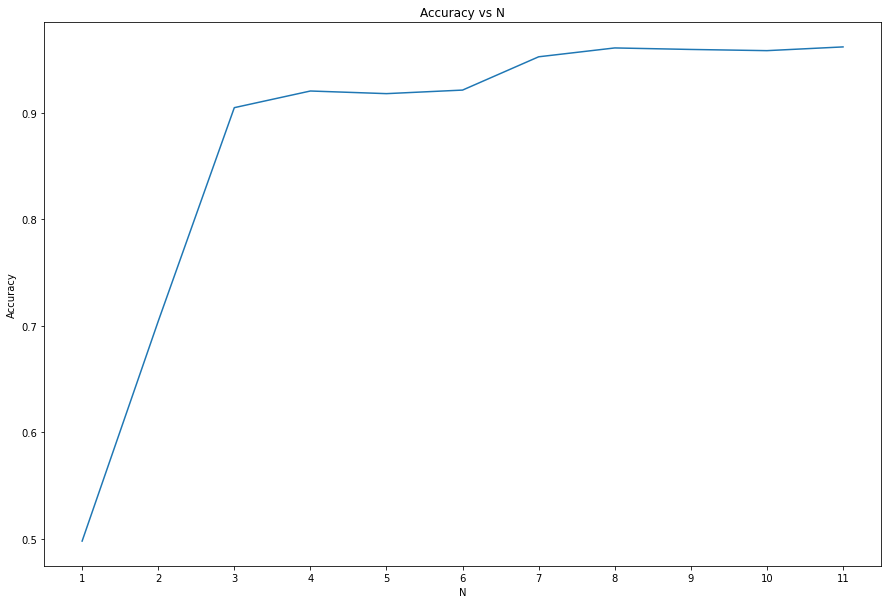

In [23]:
loop_best_n(df1, RandomForestRegressor())

In [ ]:
#DE ACUERDO AL ANALISIS ANTERIOR, LA MEJOR PRESICIÓN SE OBTUVO CON N entre 8 y 11

#Separamos la columna objetivo
target = df1['MEDV']
#Para aplicar ExtraTreesClassifier() es necesario que los datos sean enteros,
#una vez realizada la eliminación recursiva, los datos se vuelven a considerar flotantes.
target = np.round(target).astype(int)

#Eliminamos la columna objetivo del dataset
df2 = df1.drop(['MEDV'], axis=1)
columnas = list(df2.columns.values)

n = 8 #Número de atributos a seleccionar: se tomó n=8 dado que la diferencia en accuracy al aumentar dicho valor es casi insignificante.
modelo = ExtraTreesClassifier()
recursive_delete = RFE(estimator=modelo, n_features_to_select=n)
recursive_delete = recursive_delete.fit(df2, target)

atrib = recursive_delete.support_
relevant_features = [columnas[i] for i in list(atrib.nonzero()[0])]
relevant_features.append('MEDV') #Volvemos a incluir el atributo target junto con los atributos mas relevantes

#Dataframe final con las características más importantes
df3 = df1[relevant_features]
df3

In [ ]:
train, validate, test = train_validate_test_split(df3, 0.8, 0.15)
print(f"Datos de entrenamiento: {train.shape}")
print(f"Datos de validacion: {validate.shape}")
print(f"Datos de prueba: {test.shape}")

X_train = train.iloc[:,:-1]
y_train = train.loc[:,['MEDV']] #Atributo objetivo

X_validate = validate.iloc[:,:-1]
y_validate = validate.loc[:,['MEDV']] #Atributo objetivo

X_test = test.iloc[:,:-1]
y_test = test.loc[:,['MEDV']] #Atributo objetivo

regression = RandomForestRegressor()
regression.fit(X_train, np.ravel(y_train))

y_pred = regression.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("Accuracy:",accuracy*100,"%\n")

#Resultados para 10 datos de prueba
for count, price in enumerate(y_test['MEDV'].iloc[0:10]):
  print(f"{count+1}. Predicted price(x1000): {round(y_pred[count],3)} - Real price(x1000): {price}")

Datos de entrenamiento: (404, 11)
Datos de validacion: (75, 11)
Datos de prueba: (27, 11)
Accuracy: 95.82874953333267 %

1. Predicted price(x1000): 14.267 - Real price(x1000): 16.3
2. Predicted price(x1000): 15.264 - Real price(x1000): 13.1
3. Predicted price(x1000): 31.316 - Real price(x1000): 29.6
4. Predicted price(x1000): 12.19 - Real price(x1000): 13.1
5. Predicted price(x1000): 14.286 - Real price(x1000): 19.1
6. Predicted price(x1000): 10.161 - Real price(x1000): 12.1
7. Predicted price(x1000): 20.366 - Real price(x1000): 21.7
8. Predicted price(x1000): 22.601 - Real price(x1000): 21.9
9. Predicted price(x1000): 34.695 - Real price(x1000): 33.2
10. Predicted price(x1000): 27.899 - Real price(x1000): 29.9


### 3.5. Regresión basada en K vecinos más cercanos

En base a ensayos realizados y tomando en consideración las pruebas anteriores donde el número óptimo de atributos se encontraba en torno a los 7 a 11 atributos, se tomarán 8 atributos para luego iterar y obtener el número óptimo de vecinos mas cercanos.

In [ ]:
#Para el caso de K vecinos más cercanos utilizaremos todos los atributos pero iteraremos para conocer el número óptimo de vecinos

#Separamos la columna objetivo
target = df1['MEDV']
#Para aplicar ExtraTreesClassifier() es necesario que los datos sean enteros,
#una vez realizada la eliminación recursiva, los datos se vuelven a considerar flotantes.
target = np.round(target).astype(int)

#Eliminamos la columna objetivo del dataset
df2 = df1.drop(['MEDV'], axis=1)
columnas = list(df2.columns.values)

n = 8 #Número de atributos a seleccionar
modelo = ExtraTreesClassifier()
recursive_delete = RFE(estimator=modelo, n_features_to_select=n)
recursive_delete = recursive_delete.fit(df2, target)

atrib = recursive_delete.support_
relevant_features = [columnas[i] for i in list(atrib.nonzero()[0])]
relevant_features.append('MEDV') #Volvemos a incluir el atributo target junto con los atributos mas relevantes

#Dataframe final con las características más importantes
df3 = df1[relevant_features]
df3

,CRIM,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,MEDV
0,0.00632,0.538,6.575,65.200000,4.0900,15.3,396.90,4.980000,24.0
1,0.02731,0.469,6.421,78.900000,4.9671,17.8,396.90,9.140000,21.6
2,0.02729,0.469,7.185,61.100000,4.9671,17.8,392.83,4.030000,34.7
3,0.03237,0.458,6.998,45.800000,6.0622,18.7,394.63,2.940000,33.4
4,0.06905,0.458,7.147,54.200000,6.0622,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...
501,0.06263,0.573,6.593,69.100000,2.4786,21.0,391.99,12.715432,22.4
502,0.04527,0.573,6.120,76.700000,2.2875,21.0,396.90,9.080000,20.6
503,0.06076,0.573,6.976,91.000000,2.1675,21.0,396.90,5.640000,23.9
504,0.10959,0.573,6.794,89.300000,2.3889,21.0,393.45,6.480000,22.0


In [ ]:
train, validate, test = train_validate_test_split(df3, 0.8, 0.15)
print(f"Datos de entrenamiento: {train.shape}")
print(f"Datos de validacion: {validate.shape}")
print(f"Datos de prueba: {test.shape}")

X_train = train.iloc[:,:-1]
y_train = train.loc[:,['MEDV']] #Atributo objetivo

X_validate = validate.iloc[:,:-1]
y_validate = validate.loc[:,['MEDV']] #Atributo objetivo

X_test = test.iloc[:,:-1]
y_test = test.loc[:,['MEDV']] #Atributo objetivo

Datos de entrenamiento: (404, 9)
Datos de validacion: (75, 9)
Datos de prueba: (27, 9)


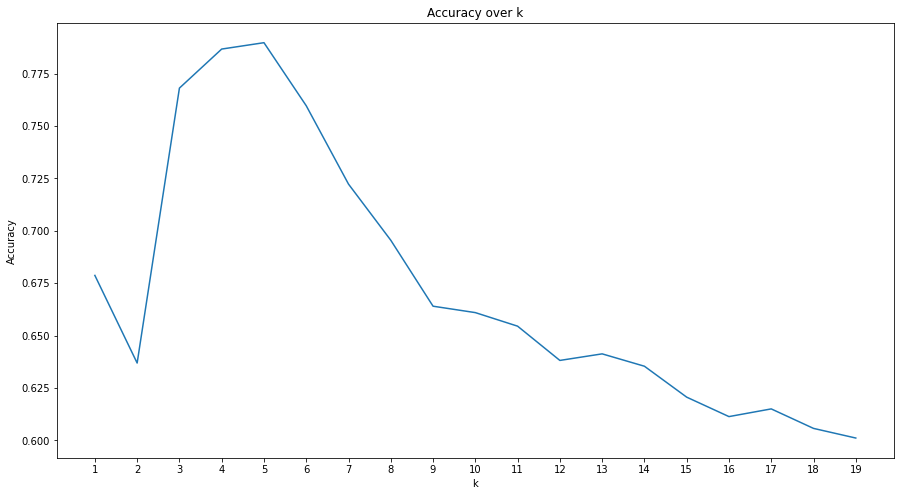

In [ ]:
scores = []
x_range = []
for k in range(1,20):
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))
  x_range.append(k)

plt.figure(figsize=(15,8))
plt.plot(x_range,scores)
plt.xticks(x_range)
plt.title("Accuracy over k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()

Se observa un máximo en presición al considerar 5 vecinos más cercanos

In [ ]:
k = 5
regression = KNeighborsRegressor(n_neighbors=k)
regression.fit(X_train, np.ravel(y_train))

y_pred = regression.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("Accuracy:",accuracy*100,"%\n")

#Resultados para 10 datos de prueba
for count, price in enumerate(y_test['MEDV'].iloc[0:10]):
  print(f"{count+1}. Predicted price(x1000): {round(y_pred[count],3)} - Real price(x1000): {price}")

Accuracy: 78.97543059521527 %

1. Predicted price(x1000): 20.06 - Real price(x1000): 16.3
2. Predicted price(x1000): 14.02 - Real price(x1000): 13.1
3. Predicted price(x1000): 26.76 - Real price(x1000): 29.6
4. Predicted price(x1000): 13.28 - Real price(x1000): 13.1
5. Predicted price(x1000): 21.68 - Real price(x1000): 19.1
6. Predicted price(x1000): 16.04 - Real price(x1000): 12.1
7. Predicted price(x1000): 20.46 - Real price(x1000): 21.7
8. Predicted price(x1000): 24.04 - Real price(x1000): 21.9
9. Predicted price(x1000): 31.58 - Real price(x1000): 33.2
10. Predicted price(x1000): 23.54 - Real price(x1000): 29.9


### 3.6. Regresión No Lineal empleando método Lasso

Por último, probaremos un modelo de regresión no lineal, empleando el método Lasso, considerando todos los atributos del dataset.

In [46]:
train, validate, test = train_validate_test_split(df1, 0.8, 0.15)
print(f"Datos de entrenamiento: {train.shape}")
print(f"Datos de validacion: {validate.shape}")
print(f"Datos de prueba: {test.shape}")

X_train = train.iloc[:,:-1]
y_train = train.loc[:,['MEDV']] #Atributo objetivo

X_validate = validate.iloc[:,:-1]
y_validate = validate.loc[:,['MEDV']] #Atributo objetivo

X_test = test.iloc[:,:-1]
y_test = test.loc[:,['MEDV']] #Atributo objetivo

Datos de entrenamiento: (404, 14)
Datos de validacion: (75, 14)
Datos de prueba: (27, 14)


In [47]:
lasso_regression = Lasso(alpha=0.01, normalize= True)
lasso_regression.fit(X_train, y_train)

y_pred = lasso_regression.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("Accuracy:",accuracy*100,"%\n")

#Result for 10 test data
for count, price in enumerate(y_test['MEDV'].iloc[0:10]):
  print(f"{count+1}. Predicted price(x1000): {round(y_pred[count],3)} - Real price(x1000): {price}")

Accuracy: 82.6811777933121 %

1. Predicted price(x1000): 10.688 - Real price(x1000): 16.3
2. Predicted price(x1000): 15.18 - Real price(x1000): 13.1
3. Predicted price(x1000): 27.147 - Real price(x1000): 29.6
4. Predicted price(x1000): 19.5 - Real price(x1000): 13.1
5. Predicted price(x1000): 16.209 - Real price(x1000): 19.1
6. Predicted price(x1000): 17.608 - Real price(x1000): 12.1
7. Predicted price(x1000): 23.293 - Real price(x1000): 21.7
8. Predicted price(x1000): 25.009 - Real price(x1000): 21.9
9. Predicted price(x1000): 34.904 - Real price(x1000): 33.2
10. Predicted price(x1000): 30.652 - Real price(x1000): 29.9


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


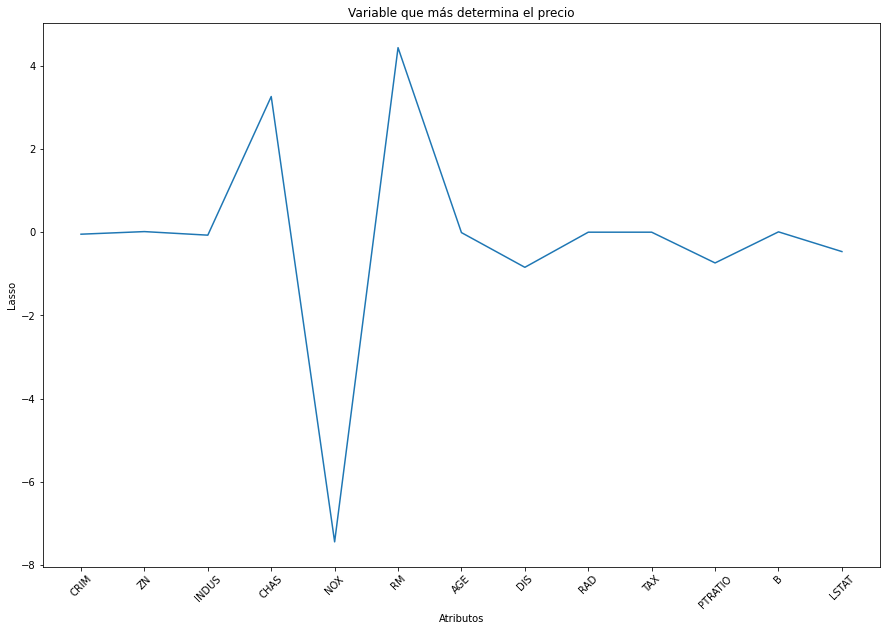

In [50]:
#Busqueda de la variable que más determina el precio
atributos = df1.drop("MEDV", axis=1).columns
lasso_coef = lasso_regression.coef_

plt.figure(figsize=(15,10))
plt.plot(range(len(atributos)), lasso_coef)
plt.xticks(range(len(atributos)), atributos, rotation=45)
plt.xlabel("Atributos")
plt.ylabel("Lasso")
plt.title("Variable que más determina el precio")
plt.show()

## 4. Conclusiones

* Una vez evaluados los distintos modelos de regresión antes presentados, podemos observar que el modelo de regresión basado en Random Forest obtuvo la mejor precisión.

* Sin embargo, el modelo basado el Árbol de Decisión también tuvo una presición bastante cercana al anterior.

* Podemos apreciar como para nuestro modelo de regresión no lineal, el número de habitaciones (RM) y la cercanía con el Río Charles (CHAS) son los atributos más importantes en cuanto al precio de la casa. De igual manera, es notorio el gran efecto adverso que tiene en la predicción del precio la concentración de óxido nítrico en el ambiente.

* Por último, observando los valores de precios predichos, empleando todos los modelos, podemos apreciar que los mismos son bastante cercanos a los valores reales.